In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
from astropy.cosmology import Planck18
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/home/zixuan/anaconda3/envs/dm21cm-ann/lib/python3.9/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/zixuan/anaconda3/envs/dm21cm-ann/lib/python3.9/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
# check that the environment variables are set correctly
print('DM21CM_DIR:     ', os.environ['DM21CM_DIR'])      # Set to the working directory of DM21cm. This directory should contain DM21cm's `README.md`
print('DM21CM_DATA_DIR:', os.environ['DM21CM_DATA_DIR']) # Set to directory containing DM21cm's data files. This directory should contain `abscissas.h5`
print('DH_DIR:         ', os.environ['DH_DIR'])          # Set to the working directory of DarkHistory. This directory should contain DarkHistory's `README.md`
print('DH_DATA_DIR:    ', os.environ['DH_DATA_DIR'])     # Set to directory containing DarkHistory's data files. This directory should contain `binning.h5`
print('P21C_CACHE_DIR: ', os.environ['P21C_CACHE_DIR'])  # Set to directory where you want to store the 21cmFAST cache. The files for a particular run will be stored in a subdirectory of this directory.

DM21CM_DIR:      /home/zixuan/DM21cm-ann/
DM21CM_DATA_DIR: /home/zixuan/DM21cm-data/
DH_DIR:          /home/zixuan/DarkHistory-DM21cm-ann
DH_DATA_DIR:     /home/zixuan/DHdata_v1_1_full/
P21C_CACHE_DIR:  /home/zixuan/DM21cm-ann-cache/


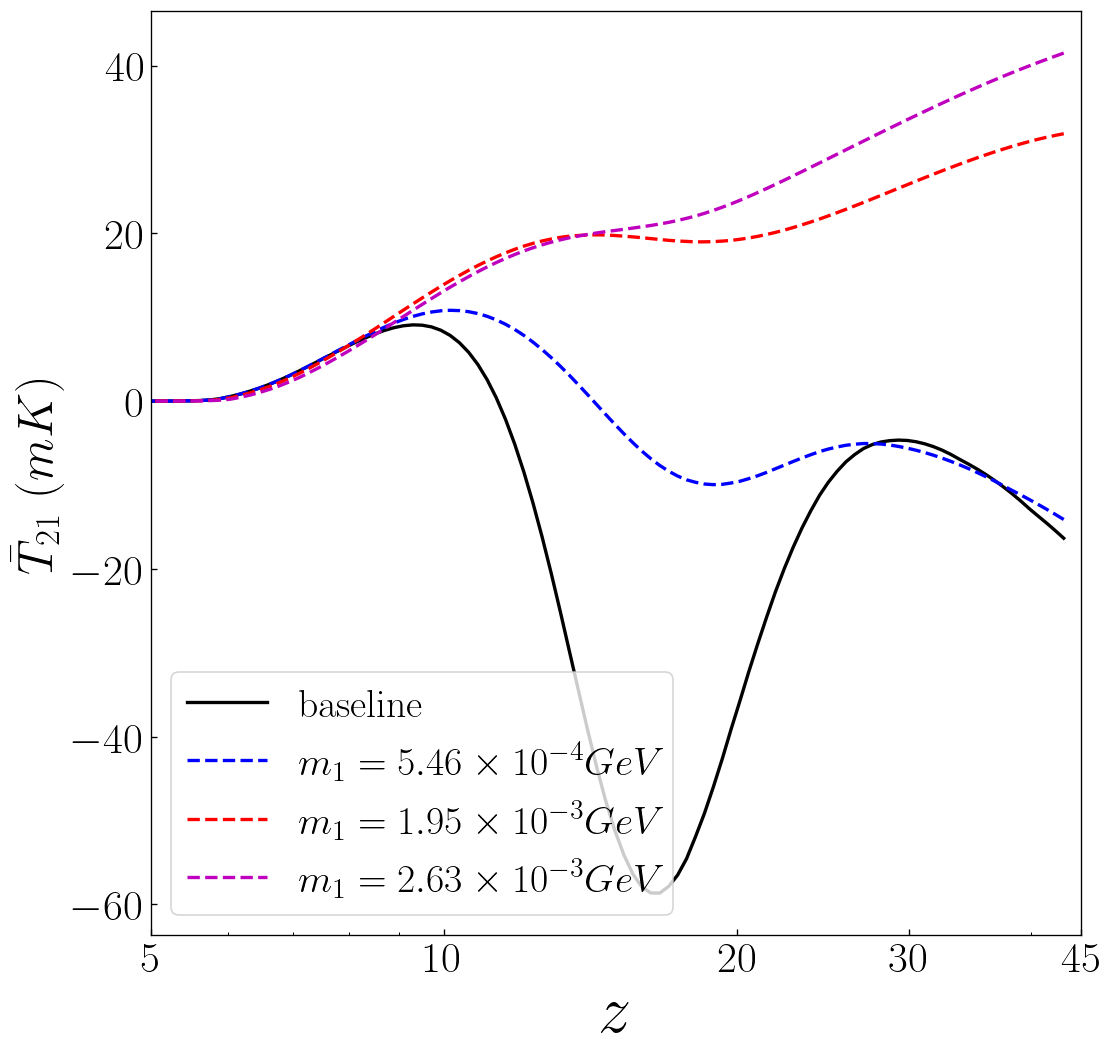

In [3]:
rec = np.load('/home/zixuan/DM21cm/examples/NeutrinoPortal_data/base/global_records.npy', allow_pickle=True).item()
rec1 = np.load('/home/zixuan/DM21cm/examples/NeutrinoPortal_data/decay1/global_records.npy', allow_pickle=True).item()
rec3 = np.load('/home/zixuan/DM21cm/examples/NeutrinoPortal_data/decay3/global_records.npy', allow_pickle=True).item()
rec5 = np.load('/home/zixuan/DM21cm/examples/NeutrinoPortal_data/decay5/global_records.npy', allow_pickle=True).item()

fig, ax = plt.subplots(figsize=(10, 10))

def format_xaxis(ax):
    ax.set(xlim=(5, 45), xscale='log')
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax.set(xticks=[5, 10, 20, 30, 45], xticklabels=['5', '10', '20', '30', '45'])


ax.plot(rec['z'], rec['T_b'], color='k', lw=2, label='baseline')
ax.plot(rec1['z'], rec1['T_b'], color='b', lw=2, linestyle='--', label=r'$m_1=5.46\times10^{-4}GeV$')
ax.plot(rec3['z'], rec3['T_b'], color='r', lw=2, linestyle='--', label=r'$m_1=1.95\times10^{-3}GeV$')
ax.plot(rec5['z'], rec5['T_b'], color='m', lw=2, linestyle='--', label=r'$m_1=2.63\times10^{-3}GeV$')
ax.legend(fontsize=24)
format_xaxis(ax)
ax.set_xlabel(r'$z$', fontsize=40);
ax.set_ylabel(r'$\bar{T}_{21}\ (mK)$', fontsize=30);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26)
ax.tick_params(axis='both', which='both', direction='in')
ax.tick_params(axis='both', which='both', direction='in')